### 풀링과 스트라이드를 사용하는 이유?



- 파라미터를 줄이는 효과가 있습니다

---

# CNN을 통한 이미지 분류

## 라이브러리 Import

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Mnist dataset Import

In [ ]:
# MNIST 데이터셋 불러오기
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# 모델 생성

모델 구성하는 방법 2가지
- Sequential API
- Function API


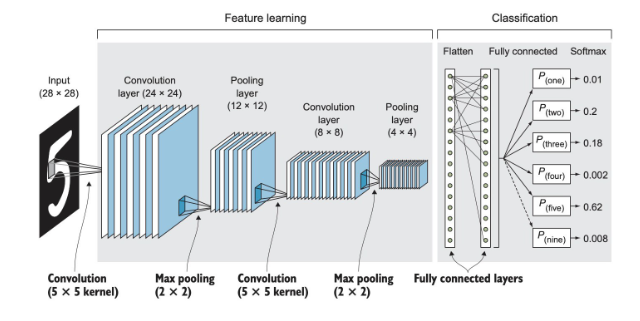

In [14]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',strides=1, padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         200,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257,162 (1004.54 KB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9084 - loss: 0.2918
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 98s 52ms/step - accuracy: 0.9868 - loss: 0.0442
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 146s 54ms/step - accuracy: 0.9908 - loss: 0.0288
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9936 - loss: 0.0205
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 143s 52ms/step - accuracy: 0.9952 - loss: 0.0148
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 145s 54ms/step - accuracy: 0.9960 - loss: 0.0126
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 52ms/step - accuracy: 0.9965 - loss: 0.0104
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 52ms/step - accuracy: 0.9972 - loss: 0.0083
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 51ms/step - accuracy: 0.9982 - loss: 0.0057
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 144s 52ms/step - accuracy: 0.9976 - loss: 0.0074


# 과적합이란?

훈련 데이터셋에 너무 적합한 나머지 검증 데이터셋에는 제대로 작동하지 않는 것

## 이를 방지하기 위한 방법은?
- Dropout

# 드랍아웃이란

드랍아웃(Dropout)은 딥러닝 모델의 학습 과정에서 과적합(overfitting)을 방지하기 위한 정규화 기법 중 하나입니다. 과적합은 모델이 학습 데이터에 너무 치우쳐 일반화 능력이 떨어지는 문제를 말합니다. 드랍아웃은 신경망의 특정 뉴런들을 임의로 '꺼서' 일부 뉴런들만 활성화시키는 방식으로 과적합을 줄이는 데 도움을 줍니다.

### 작동 원리
드랍아웃의 핵심 아이디어는 학습 중에 각 뉴런을 일정 확률로 비활성화하는 것입니다. 이는 학습 단계에서만 적용되며, 예를 들어 50% 드랍아웃을 설정하면 각 학습 단계마다 절반의 뉴런이 무작위로 비활성화됩니다. 이를 통해 신경망이 특정 뉴런이나 특정 패턴에 너무 의존하지 않도록 합니다.

### 이점
1. **과적합 방지**: 드랍아웃은 뉴런이 과도하게 상호 의존하지 않게 하여 과적합을 방지합니다.
2. **강건성 향상**: 신경망이 여러 랜덤한 서브 네트워크를 학습하게 되어 모델의 강건성이 향상됩니다.
3. **효율적인 계산**: 드랍아웃을 사용하면 각 학습 단계에서 계산량이 줄어들어 효율적입니다.

### 사용 방법
드랍아웃은 학습 과정에서만 적용되고, 예측(추론) 단계에서는 모든 뉴런이 활성화됩니다. 이는 학습 시 랜덤하게 일부 뉴런을 비활성화하는 대신, 예측 시에는 뉴런의 출력을 드랍아웃 비율만큼 스케일링하여 평균적인 효과를 맞추기 위해서입니다.

드랍아웃은 하이퍼파라미터로 드랍아웃 비율을 설정할 수 있으며, 일반적으로 0.2에서 0.5 사이의 값을 사용합니다. 이 비율은 네트워크의 크기와 데이터의 복잡도에 따라 조정됩니다.

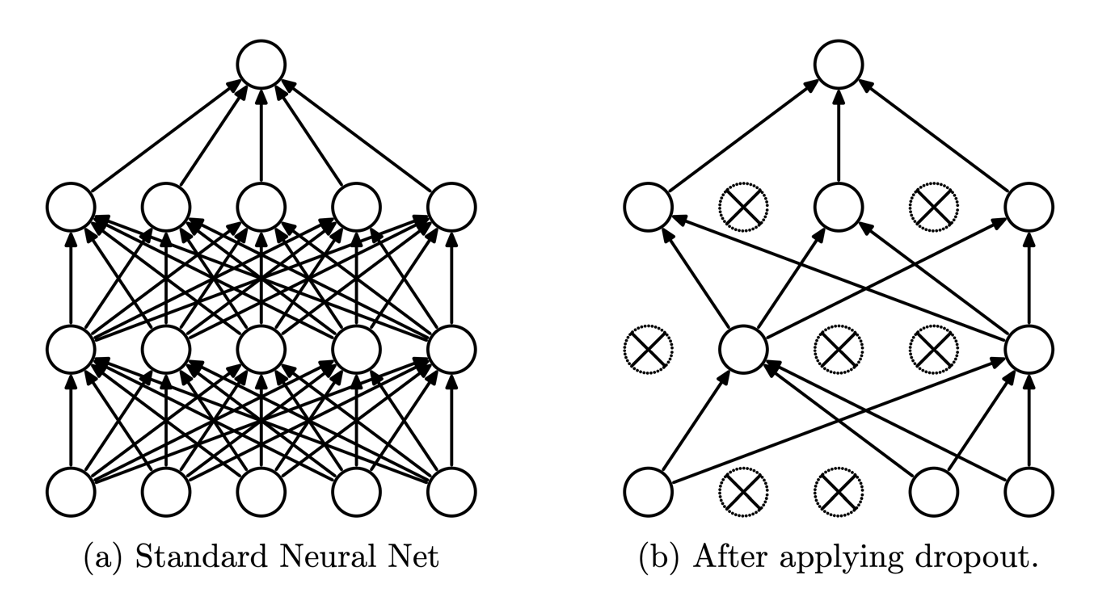

In [ ]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5)) # 드랍아웃 층 삽입